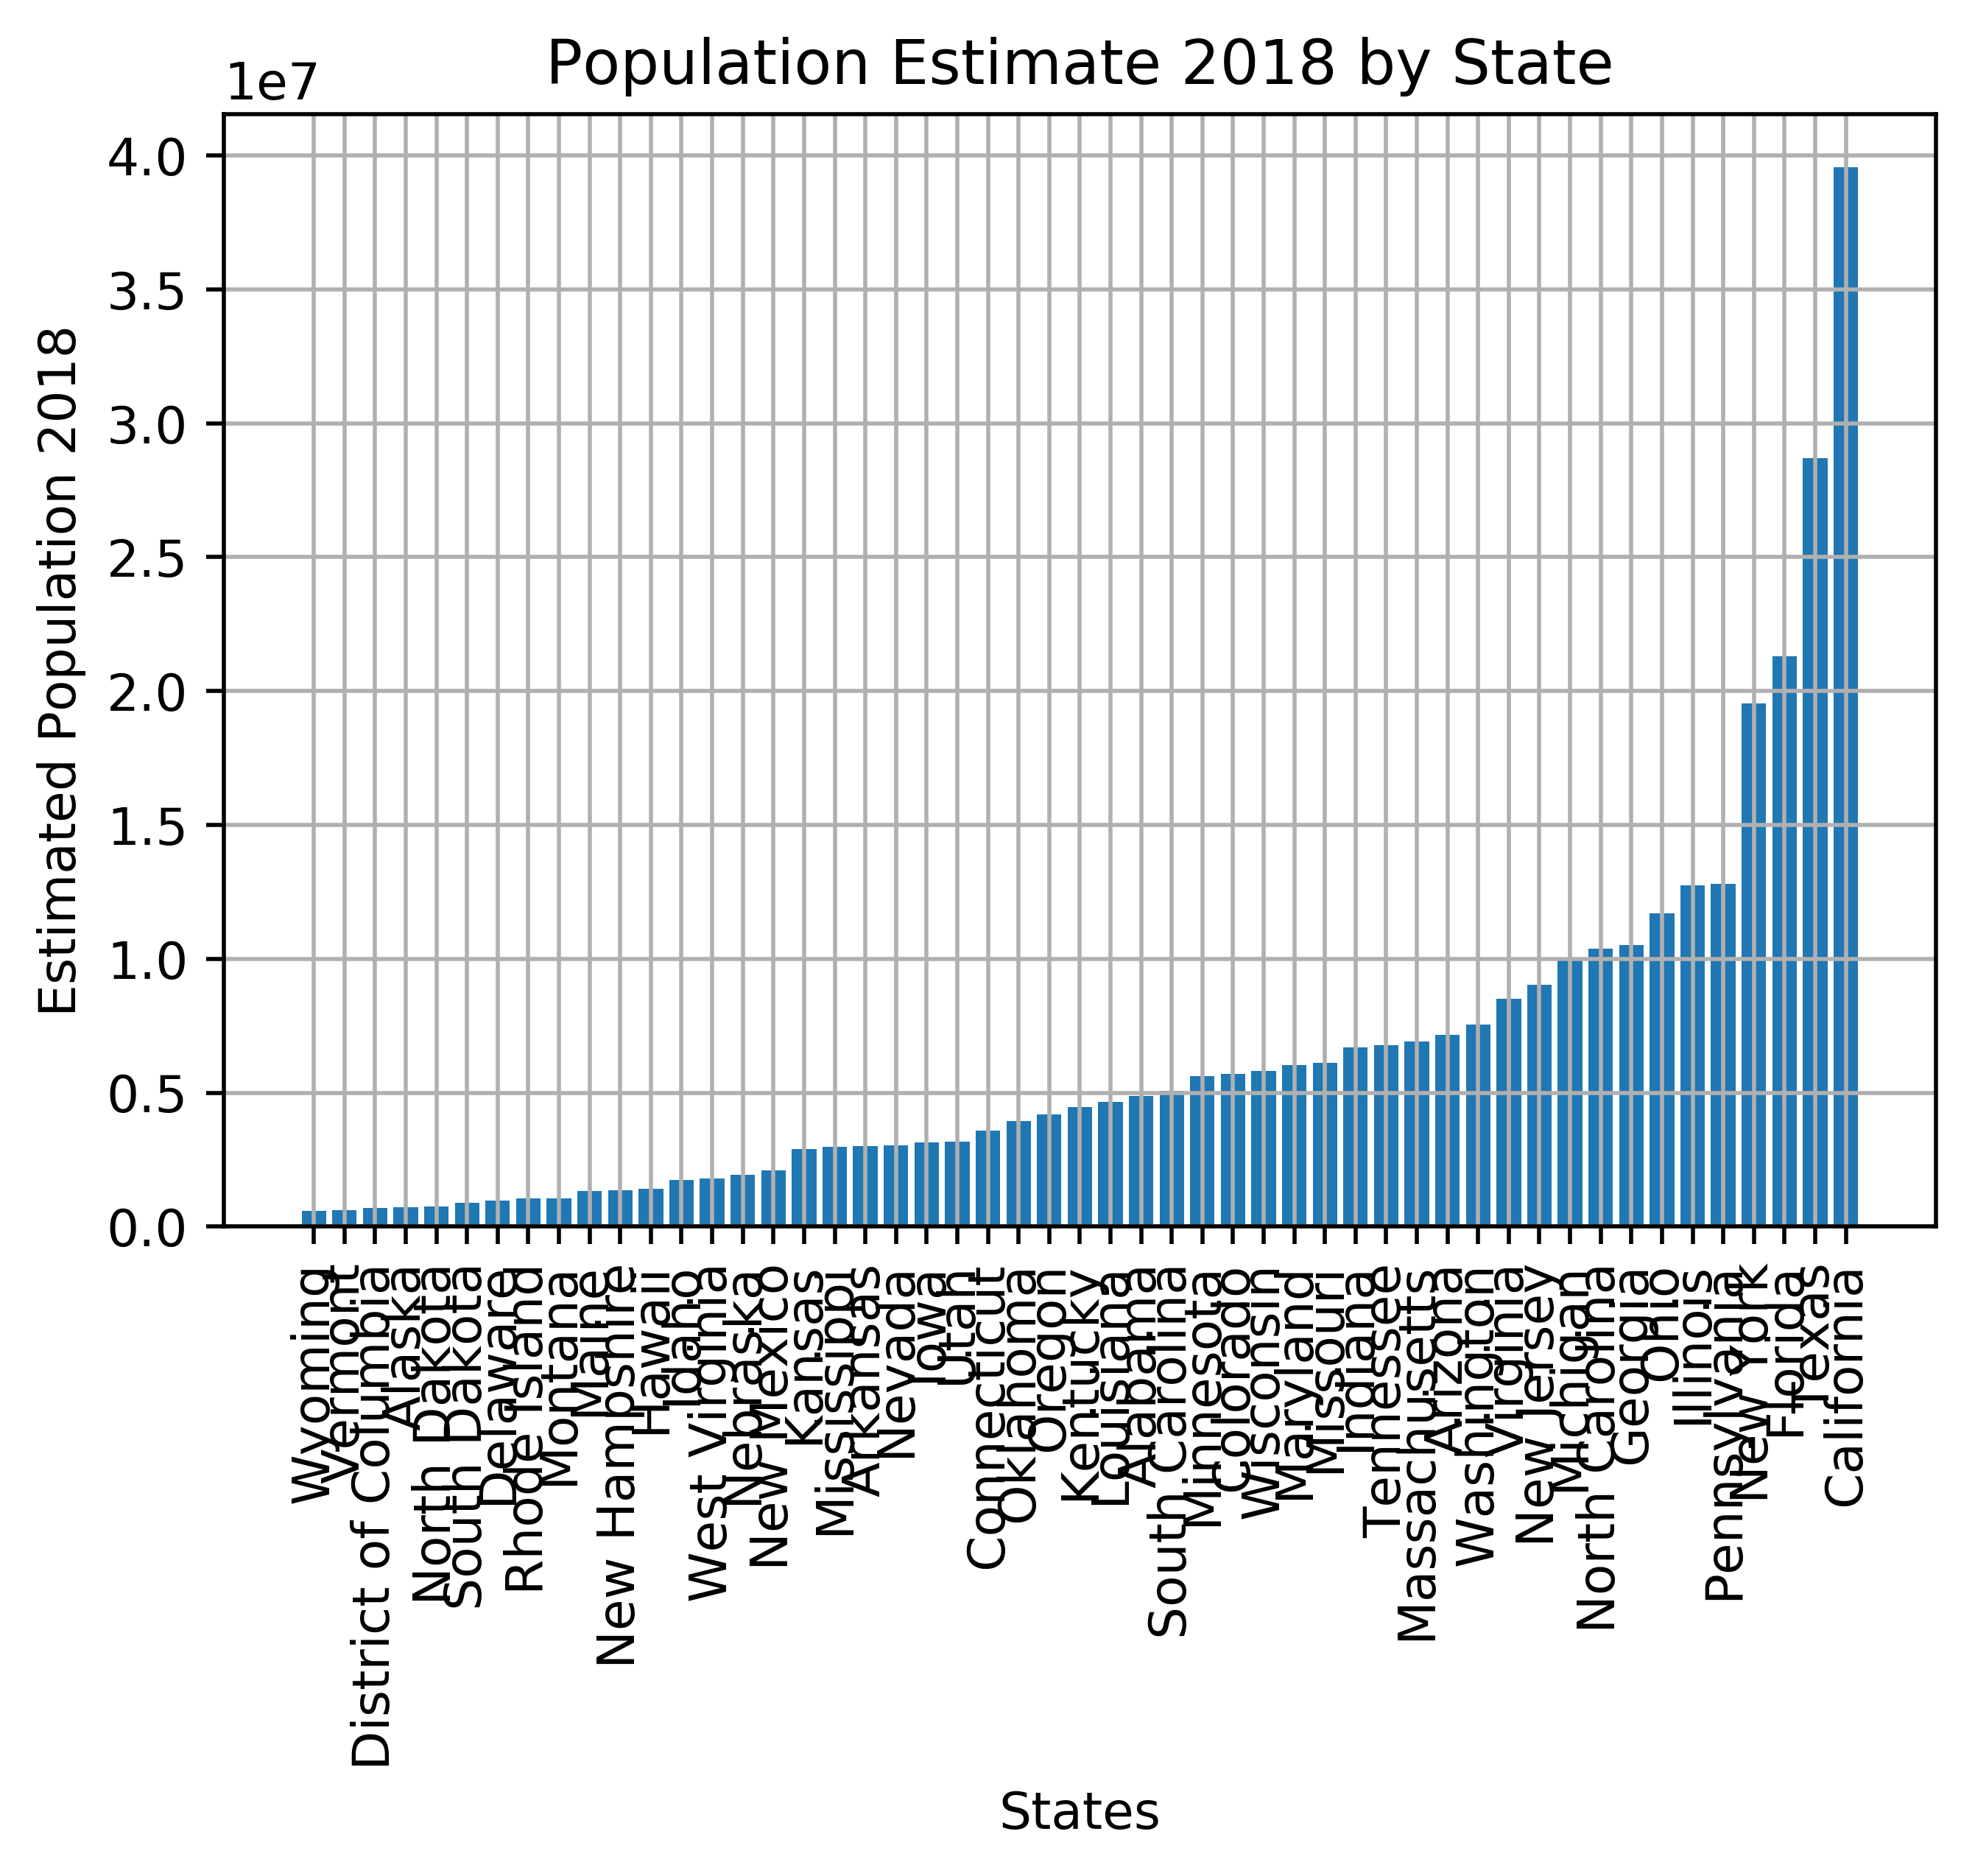

<Figure size 432x288 with 0 Axes>

In [3]:
# imports and froms
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List of states and territories of the United States by population

html = wp.page("List of states and territories of the United States by population").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html)[0]

# remove unneeded rows and columns
df_drop = df.drop(df.index[52:69])
df_drop = df_drop.drop([29]) 

df_drop = df_drop.drop(columns = ['Rank in the fifty states, 2018', 'Rank in States & Territories', 'Percent increase from 2010-2018[note 1]', 'Total seats in the U.S. House of Representatives, 2013â2023', 'Estimated population per electoral vote, 2018[note 2]', 'Estimated population per House seat, 2018', 'Census population per House seat, 2010', 'Percent of the total U.S. population, 2018[note 3]'])

# convert text to numeric
df_convert1 = df_drop['Population estimate, July 1, 2018[4]'].apply(lambda x: x).astype(int)
df_convert2 = df_drop['Census population, April 1, 2010'].apply(lambda x: x).astype(int)


# combine lists
df_combine = pd.DataFrame(zip(df_drop['Name'], df_convert1, df_convert2))

# rename columns
df_rename = df_combine.rename(columns = {0: 'State', 1: 'Population Estimate 2018', 2:'Population Census 2010'})

# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Population Estimate 2018'])
df2 = df_sort_state
df2.to_csv('states_by_population_estimate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.title('Population Estimate 2018 by State')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Estimated Population 2018')
plt.grid()
plt.bar(df2['State'], df2['Population Estimate 2018'])
plt.show()
plt.savefig('population_estimate_state.png')

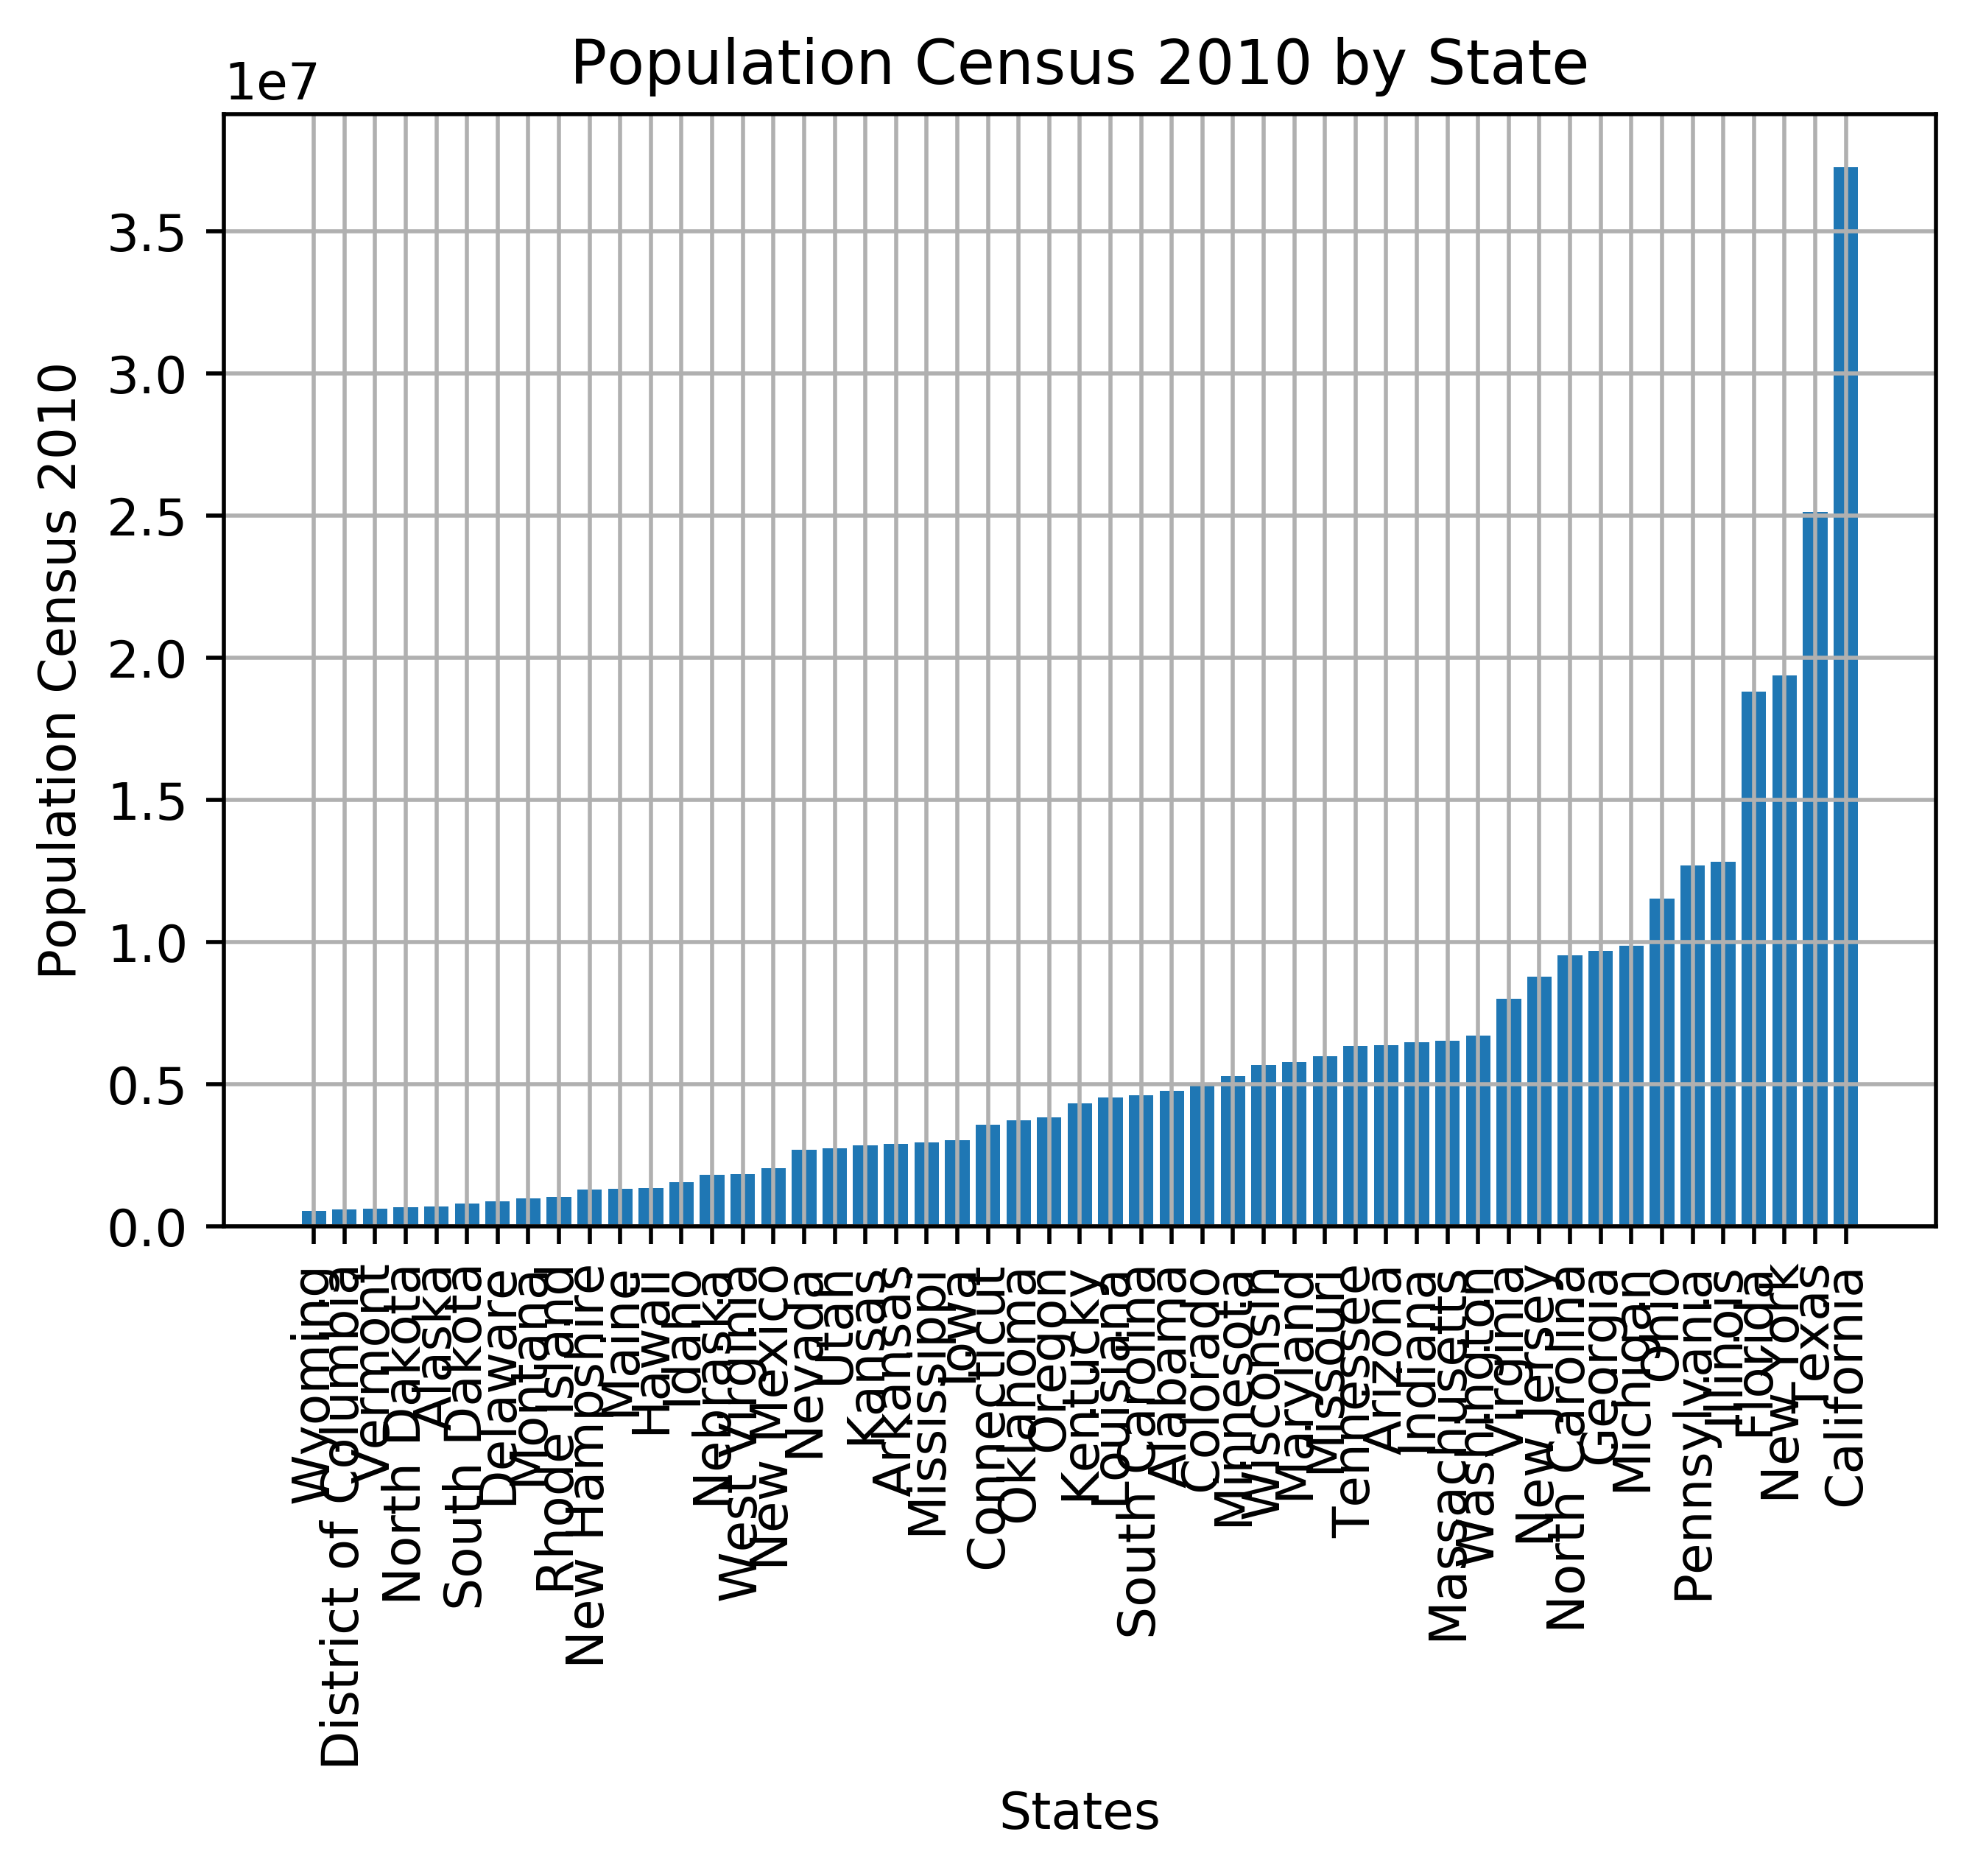

<Figure size 432x288 with 0 Axes>

In [2]:
# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Population Census 2010'])
df2 = df_sort_state
df2.to_csv('states_by_population_census.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.title('Population Census 2010 by State')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel('Population Census 2010')
plt.grid()
plt.bar(df2['State'], df2['Population Census 2010'])
plt.show()
plt.savefig('population_census_state.png')